In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titaniccleaningfeatureengineering/custom.css
/kaggle/input/titaniccleaningfeatureengineering/__notebook__.ipynb
/kaggle/input/titaniccleaningfeatureengineering/testC.csv
/kaggle/input/titaniccleaningfeatureengineering/__results__.html
/kaggle/input/titaniccleaningfeatureengineering/__output__.json
/kaggle/input/titaniccleaningfeatureengineering/trainC.csv
/kaggle/input/titaniccleaningfeatureengineering/__results___files/__results___13_0.png


In [2]:
train = pd.read_csv('../input/titaniccleaningfeatureengineering/trainC.csv')
test = pd.read_csv('../input/titaniccleaningfeatureengineering/testC.csv')
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
sc = MinMaxScaler()
X = sc.fit_transform(train[train.columns[1:]])
test = sc.fit_transform(test)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# baseline MLP
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
print("training accuracy",mlp.score(X_train, y_train))
print("test accuracy", mlp.score(X_test, y_test))

training accuracy 0.9508426966292135
test accuracy 0.9329608938547486


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [5]:
submission['Survived'] = mlp.predict(test)
submission.to_csv("submission.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [6]:
#relu cuts off values below zero
#tanh saturates to -1 for low input values and +1 for high input values
#alpha: regularization parameter (l2)

parameters = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['tanh', 'relu'],
              'solver': ['l-bfgs', 'adam', 'sgd'],
              'learning_rate': ['constant','adaptive'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001, 0.05, 0.1, 0.2],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}

grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                         'alpha': [0.0001, 0.05, 0.1, 0.2],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18,
               

In [7]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9325519550871663
{'activation': 'relu', 'alpha': 0.2, 'early_stopping': True, 'hidden_layer_sizes': 7, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 1000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}
MLPClassifier(activation='relu', alpha=0.2, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [8]:
submission['Survived'] = grid.predict(test)
submission.to_csv("submission_GridSearchCV.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


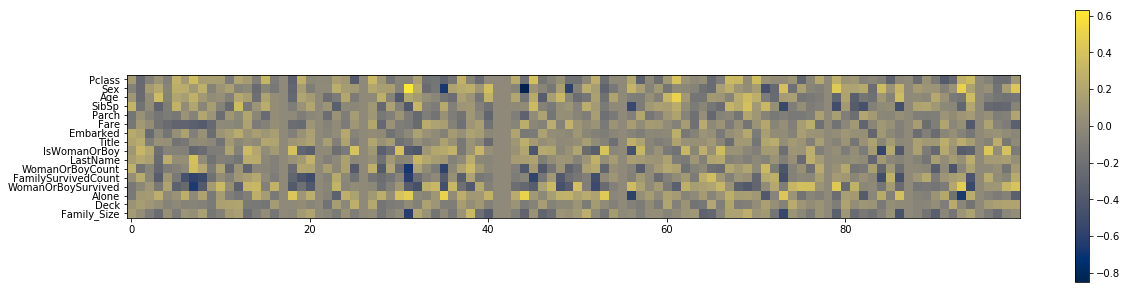

In [9]:
# visualize the weights that were learned connecting the input to the first hidden layer
#the rows correspond to the input features, the columns correspond to the hidden units

plt.figure(figsize=(20, 5)) 
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='cividis') 
plt.yticks(range(len(train.columns[1:])), list(train.columns[1:])) 
plt.colorbar()

In [10]:
mlp.coefs_

[array([[ 0.12851108, -0.25876412, -0.06369428, ..., -0.21060124,
         -0.20435515,  0.09411594],
        [-0.06387471, -0.24750165,  0.13245251, ..., -0.17719913,
          0.15309331,  0.44012306],
        [ 0.0976294 , -0.23585084,  0.02848739, ..., -0.15825075,
         -0.18298619, -0.14638894],
        ...,
        [-0.12627653,  0.11632891,  0.13676445, ..., -0.10992208,
         -0.06378731, -0.32683406],
        [ 0.07282921,  0.14606542,  0.09572838, ...,  0.16900289,
          0.19120327,  0.1918052 ],
        [ 0.12611522,  0.03008897, -0.10338923, ..., -0.22975544,
         -0.01766487,  0.02990756]]),
 array([[-1.83883835e-01],
        [ 1.60510576e-01],
        [ 1.70196687e-01],
        [-3.22640542e-01],
        [ 2.07306554e-01],
        [-3.92113236e-01],
        [-3.79143983e-01],
        [-6.62981373e-01],
        [-3.09123280e-01],
        [-1.28895395e-01],
        [ 1.51638868e-01],
        [ 2.56883775e-01],
        [-2.91576174e-01],
        [ 3.71456129e-